In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import sklearn
import os
%matplotlib inline
from tensorflow.keras import Sequential
import tensorflow as tf
import tensorflow.keras.layers
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
import tensorflow.keras.losses

In [26]:
df = pd.read_csv("dataset.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
# df = df[df['severity'].isin(["medium", "small", "large", "very_large", "na"])]
df['severity'].value_counts()
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

In [28]:
def convert(field, func):
	global df
	df[field] = df[field].apply(func)

In [29]:
X = df.copy()
y = X.landslide
columns=[]
for i in range(9, 2, -1):
    columns.append('humidity' + str(i))
    columns.append('ARI' + str(i))
    columns.append('wind' + str(i))
X = X[columns]
for i in range(9, 2, -1):
    X['ARI' + str(i)] = X['ARI' + str(i)].apply(float)
X

,humidity9,ARI9,wind9,humidity8,ARI8,wind8,humidity7,ARI7,wind7,humidity6,...,wind6,humidity5,ARI5,wind5,humidity4,ARI4,wind4,humidity3,ARI3,wind3
0,72,0.556880,22,75,2.201197,26,83,0.677670,21,74,...,17,70,1.836522,23,71,0.511386,16,79,4.283873,25
1,80,0.085825,16,84,0.050057,14,71,0.028576,14,82,...,26,85,0.153854,30,85,0.386717,22,82,0.309143,24
2,90,0.640841,16,92,0.548408,16,94,1.157563,14,85,...,13,84,0.158862,11,87,2.078817,15,88,1.352717,18
3,71,0.270180,19,73,0.232671,17,77,0.182073,21,83,...,33,67,0.606089,30,66,0.266716,19,77,1.405961,21
4,46,0.007992,30,25,0.003675,36,42,0.002700,24,44,...,41,41,0.000000,35,56,2.050540,25,73,1.637125,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,94,2.382064,13,98,5.932884,10,96,1.879734,11,89,...,9,90,1.165618,10,88,2.939858,12,95,0.925101,9
17804,91,3.181230,17,87,0.895018,14,87,1.929670,6,92,...,10,87,5.363040,7,89,3.976052,8,92,4.062424,13
17805,97,2.002024,13,97,6.466107,9,100,9.851931,10,98,...,8,96,4.772888,6,97,4.668184,8,97,2.143599,6
17806,88,0.765353,17,89,0.392524,17,87,0.400223,16,86,...,15,79,0.107404,17,89,1.593113,14,92,1.051581,15


In [30]:
y.value_counts()

1    10306
0     7502
Name: landslide, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train[0]

array([97.        ,  9.16920965,  9.        , 97.        , 10.199934  ,
        8.        , 97.        ,  3.82319175,  9.        , 89.        ,
        1.75261042, 10.        , 93.        ,  3.96493901, 10.        ,
       91.        ,  1.4204574 ,  6.        , 94.        ,  2.06859881,
        6.        ])

In [34]:
y_train = np.array(y_train)
y_test = np.array(y_test)
# len(X_train) # of batches
# 5 timesteps (days 7 - 3)
# 2 features per timestep
X_train=X_train.reshape((len(X_train), 7, 3))
X_test=X_test.reshape((len(X_test), 7, 3))
print(X_train.shape)
X_train[0]

(14246, 7, 3)


array([[97.        ,  9.16920965,  9.        ],
       [97.        , 10.199934  ,  8.        ],
       [97.        ,  3.82319175,  9.        ],
       [89.        ,  1.75261042, 10.        ],
       [93.        ,  3.96493901, 10.        ],
       [91.        ,  1.4204574 ,  6.        ],
       [94.        ,  2.06859881,  6.        ]])

In [35]:
original = Sequential()
original.add(Bidirectional(LSTM(11)))
original.add(Dense(1))
original.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
original.fit(X_train, y_train, epochs = 15, batch_size = 20, verbose = 2)
# res = LSTM(11)
# out = res(X_train)
# print(out.shape)

Epoch 1/15
713/713 - 2s - loss: 0.6208 - accuracy: 0.6830
Epoch 2/15
713/713 - 2s - loss: 0.6029 - accuracy: 0.6942
Epoch 3/15
713/713 - 2s - loss: 0.6034 - accuracy: 0.6912
Epoch 4/15
713/713 - 2s - loss: 0.6098 - accuracy: 0.6904
Epoch 5/15
713/713 - 2s - loss: 0.5859 - accuracy: 0.6969
Epoch 6/15
713/713 - 2s - loss: 0.5814 - accuracy: 0.7021
Epoch 7/15
713/713 - 2s - loss: 0.5788 - accuracy: 0.7043
Epoch 8/15
713/713 - 2s - loss: 0.5929 - accuracy: 0.7035
Epoch 9/15
713/713 - 2s - loss: 0.5762 - accuracy: 0.7100
Epoch 10/15
713/713 - 2s - loss: 0.5755 - accuracy: 0.7088
Epoch 11/15
713/713 - 2s - loss: 0.5742 - accuracy: 0.7087
Epoch 12/15
713/713 - 2s - loss: 0.5736 - accuracy: 0.7086
Epoch 13/15
713/713 - 2s - loss: 0.5718 - accuracy: 0.7110
Epoch 14/15
713/713 - 2s - loss: 0.5715 - accuracy: 0.7121
Epoch 15/15
713/713 - 2s - loss: 0.5716 - accuracy: 0.7102


In [36]:
original.evaluate(X_test, y_test)

112/112 [==============================] - 0s 1ms/step - loss: 0.5725 - accuracy: 0.7047


[0.5724890828132629, 0.7046602964401245]

In [37]:
from sklearn.metrics import confusion_matrix
res = original.predict(X_test)
LST
res = np.rint(res)
pred = np.array([int(i) for i in res])
pred

array([1, 1, 1, ..., 1, 0, 0])

In [38]:
zeroes = 0
ones = 0
types = set()
for i in pred:
    if i == 0:
        zeroes += 1
    else:
        ones += 1
    types.add(i)
print(zeroes, ones)
types

990 2572


{0, 1}

In [39]:
zeroes = 0
ones = 0
for i in y_test:
    if i == 0:
        zeroes += 1
    else:
        ones += 1
print(zeroes, ones)

1470 2092


In [40]:
array = confusion_matrix(y_test, pred)
array

array([[ 704,  766],
       [ 286, 1806]])

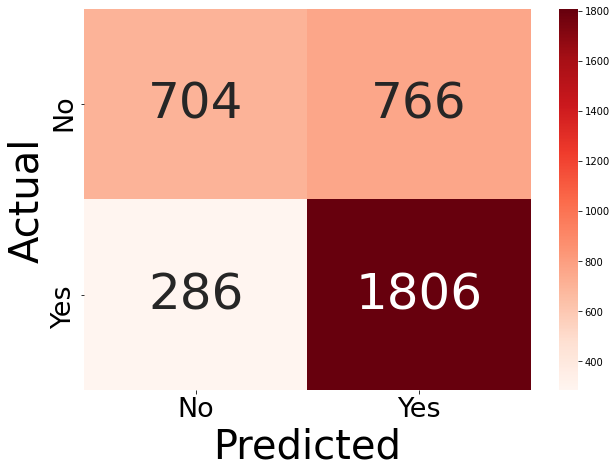

In [41]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
binary = True
if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Reds", annot=True, annot_kws={"size":50}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=27)
plt.xlabel('Predicted', fontsize = 40) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 

plt.savefig("Wind LSTM")
plt.show()

In [50]:
model = Sequential()
model.add(Bidirectional(LSTM(11)))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(X_train, y_train, epochs = 15, batch_size = 20, verbose = 2)

Epoch 1/15
713/713 - 2s - loss: 0.6221 - accuracy: 0.6566
Epoch 2/15
713/713 - 2s - loss: 0.5870 - accuracy: 0.6912
Epoch 3/15
713/713 - 2s - loss: 0.5807 - accuracy: 0.6945
Epoch 4/15
713/713 - 2s - loss: 0.5763 - accuracy: 0.7031
Epoch 5/15
713/713 - 2s - loss: 0.5768 - accuracy: 0.7041
Epoch 6/15
713/713 - 2s - loss: 0.5743 - accuracy: 0.7064
Epoch 7/15
713/713 - 2s - loss: 0.5731 - accuracy: 0.7031
Epoch 8/15
713/713 - 2s - loss: 0.5717 - accuracy: 0.7109
Epoch 9/15
713/713 - 2s - loss: 0.5710 - accuracy: 0.7085
Epoch 10/15
713/713 - 2s - loss: 0.5699 - accuracy: 0.7085
Epoch 11/15
713/713 - 2s - loss: 0.5689 - accuracy: 0.7078
Epoch 12/15
713/713 - 2s - loss: 0.5694 - accuracy: 0.7078
Epoch 13/15
713/713 - 2s - loss: 0.5682 - accuracy: 0.7123
Epoch 14/15
713/713 - 2s - loss: 0.5677 - accuracy: 0.7122
Epoch 15/15
713/713 - 2s - loss: 0.5669 - accuracy: 0.7122


In [43]:
from sklearn.metrics import confusion_matrix
res = model.predict(X_test)
res = np.rint(res)
pred = np.array([int(i) for i in res])
pred

array([1, 1, 0, ..., 1, 0, 0])

In [51]:
model.evaluate(X_test, y_test)

112/112 [==============================] - 0s 1ms/step - loss: 0.5689 - accuracy: 0.7075


[0.5689383149147034, 0.7074677348136902]

In [1]:
# array = confusion_matrix(y_test, pred)
array = [[ 865,  605],
       [ 438, 1654]]
array

[[865, 605], [438, 1654]]

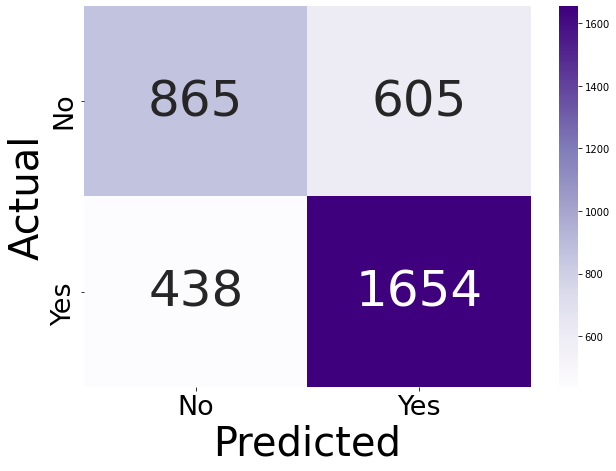

In [2]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
binary = True
if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Purples", annot=True, annot_kws={"size":50}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=27)
plt.xlabel('Predicted', fontsize = 40) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 

plt.savefig("LSTM Wind Sigmoid Confusion Matrix", bbox_inches="tight")
plt.show()

In [115]:
model2 = Sequential()
model2.add(Bidirectional(LSTM(15)))
model2.add(Dense(1))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model2.fit(X_train, y_train, epochs = 30, batch_size = 20, verbose = 2)

Epoch 1/30
713/713 - 2s - loss: 0.6706 - accuracy: 0.6346
Epoch 2/30
713/713 - 2s - loss: 0.6008 - accuracy: 0.6852
Epoch 3/30
713/713 - 2s - loss: 0.6518 - accuracy: 0.6648
Epoch 4/30
713/713 - 2s - loss: 0.6700 - accuracy: 0.6212
Epoch 5/30
713/713 - 2s - loss: 0.6430 - accuracy: 0.6381
Epoch 6/30
713/713 - 2s - loss: 0.6363 - accuracy: 0.6482
Epoch 7/30
713/713 - 3s - loss: 0.6240 - accuracy: 0.6751
Epoch 8/30
713/713 - 2s - loss: 0.6155 - accuracy: 0.6702
Epoch 9/30
713/713 - 2s - loss: 0.6056 - accuracy: 0.6858
Epoch 10/30
713/713 - 2s - loss: 0.5978 - accuracy: 0.6904
Epoch 11/30
713/713 - 2s - loss: 0.5924 - accuracy: 0.6916
Epoch 12/30
713/713 - 2s - loss: 0.5877 - accuracy: 0.6923
Epoch 13/30
713/713 - 2s - loss: 0.5863 - accuracy: 0.6948
Epoch 14/30
713/713 - 2s - loss: 0.6185 - accuracy: 0.6709
Epoch 15/30
713/713 - 2s - loss: 0.5933 - accuracy: 0.6932
Epoch 16/30
713/713 - 2s - loss: 0.5874 - accuracy: 0.6939
Epoch 17/30
713/713 - 2s - loss: 0.5879 - accuracy: 0.6927
Epoch 